# Test 1: Frequency "step"

Many improvements to the frequency detection system are possible, and some of them may involve extending the window of signal samples used to calculate the frequency estimate. As such, it will be useful to keep track of how fast our algorithm can track changes in frequency. The simplest way to test for this is to generate simulated signals consisting of two sinusoids with different frequency back-to-back, and comparing the output to the true frequency content used for signal generation.

Create a python program which generates a test signal as described above, and feeds it into the attached function `freq_detection`. Subsequently, your program should provide an analysis of the outuput from the function `freq_detection`, which can take the form of a plot showing the frequency detection system's response time to changes in frequency. This will be useful when evaluating the frequency detection system's adherence to the the following design parameter: *"The algorithm must be able to adapt to changes in fundamental frequency within $0.5$ seconds, with samples more than $0.5$ seconds old having negligible influence."*

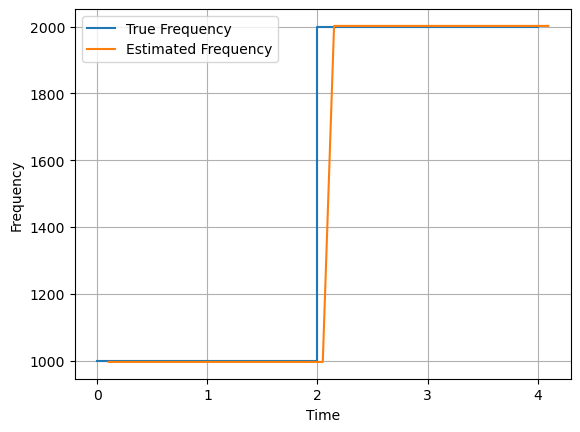

In [1]:
from baseline_algorithm import freq_detection
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(fs, N, f, A):
    t_n = np.arange(N)/fs
    signal = A*np.cos(2*np.pi*f*t_n)
    
    return signal, t_n

# Signal Settings
fs = 10_000  # Samples/second

## First Sinusoid
N_1 = 2*fs  # Samples 
f_1 = 1000  # Hertz
A_1 = 1  # Volts

## Second Sinusoid
N_2 = 2*fs  # Samples 
f_2 = 2000  # Hertz
A_2 = 1  # Volts

signal_1, time_1 = generate_signal(fs, N_1, f_1, A_1)
signal_2, time_2 = generate_signal(fs, N_2, f_2, A_2)

signal = np.concatenate((signal_1, signal_2))
time = np.concatenate((time_1, time_2))

x_n = signal
t_est, f_est = freq_detection(x_n, fs)

plt.close('all')

fig,ax = plt.subplots()
ax.plot([0, time_1[-1], time_1[-1], time_2[-1]+time_1[-1]], [f_1,f_1,f_2,f_2], label="True Frequency")
ax.plot(t_est, f_est, label="Estimated Frequency")
ax.set_ylabel('Frequency')
ax.set_xlabel('Time')
ax.grid()
ax.legend()
plt.show()

# WRITE YOUR CODE IN THIS CELL:

[Here](Figures/FreqStepTest_LF.png) is an image showing a *suggestion* for what your test output may look like when simulating a single frequency step, using two different window lengths as basis for analysis in the frequency detection algorithm.